In [1]:
import gensim
import pandas as pd
import smart_open
import random
import logging
%matplotlib inline
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
dataframe=pd.read_csv('df_hatespeech.csv')
print(dataframe.shape)
dataframe.head()

(1302, 9)


,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
1,2,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
2,3,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
3,4,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
4,5,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1


In [4]:
def read_corpus(documents):
    for i, text in enumerate(documents):
        yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(text), [i])

In [5]:
train_corpus = list(read_corpus(dataframe.comment_text))

In [6]:
train_corpus[:2]

[TaggedDocument(words=['you', 'are', 'gay', 'or', 'antisemmitian', 'archangel', 'white', 'tiger', 'meow', 'greetingshhh', 'uh', 'there', 'are', 'two', 'ways', 'why', 'you', 'do', 'erased', 'my', 'comment', 'about', 'ww', 'that', 'holocaust', 'was', 'brutally', 'slaying', 'of', 'jews', 'and', 'not', 'gays', 'gypsys', 'slavs', 'anyone', 'if', 'you', 'are', 'anti', 'semitian', 'than', 'shave', 'your', 'head', 'bald', 'and', 'go', 'to', 'the', 'skinhead', 'meetings', 'if', 'you', 'doubt', 'words', 'of', 'the', 'bible', 'that', 'homosexuality', 'is', 'deadly', 'sin', 'make', 'pentagram', 'tatoo', 'on', 'your', 'forehead', 'go', 'to', 'the', 'satanistic', 'masses', 'with', 'your', 'gay', 'pals', 'first', 'and', 'last', 'warning', 'you', 'fucking', 'gay', 'won', 'appreciate', 'if', 'any', 'more', 'nazi', 'shwain', 'would', 'write', 'in', 'my', 'page', 'don', 'wish', 'to', 'talk', 'to', 'you', 'anymore', 'beware', 'of', 'the', 'dark', 'side'], tags=[0]),
 TaggedDocument(words=['pair', 'of', 'j

In [7]:
model = gensim.models.doc2vec.Doc2Vec(size=50, min_count=2, epochs=55)
model.build_vocab(train_corpus)
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':


CPU times: user 8.03 s, sys: 1.44 s, total: 9.48 s
Wall time: 5.79 s


In [8]:
model[1]

array([ 0.02908663, -0.08862749, -0.05480144, -0.01225066, -0.05300531,
       -0.06304386, -0.15741862, -0.15425152,  0.154194  ,  0.01161947,
        0.04499703, -0.0570045 ,  0.1766961 , -0.09118516, -0.20208587,
        0.04315641, -0.05362174,  0.16048111, -0.06156814, -0.12758511,
        0.02418789, -0.05931319,  0.17633073,  0.35294265, -0.19740956,
       -0.2732477 ,  0.34324953,  0.05695618,  0.24782337,  0.01652817,
       -0.0875375 , -0.03205788, -0.03376768, -0.20613374, -0.11109994,
        0.10760272,  0.01772364,  0.26185992,  0.23442616, -0.3088764 ,
       -0.07362289, -0.29708365,  0.13698104, -0.07016011, -0.02536455,
        0.18497843, -0.00711946, -0.05340123, -0.368935  , -0.14733508],
      dtype=float32)

In [9]:
from pprint import pprint
pprint(model.docvecs.most_similar(positive=[1], topn=40))

[(778, 0.8515352606773376),
 (26, 0.8367230296134949),
 (1145, 0.8292140364646912),
 (916, 0.8290274143218994),
 (1103, 0.8239139914512634),
 (1270, 0.8212392330169678),
 (52, 0.7987248301506042),
 (1166, 0.7985961437225342),
 (501, 0.7942385077476501),
 (998, 0.7900999784469604),
 (1225, 0.7796134352684021),
 (715, 0.7791391015052795),
 (421, 0.7768442630767822),
 (1205, 0.7756721377372742),
 (1042, 0.7725451588630676),
 (802, 0.772423267364502),
 (155, 0.7715378999710083),
 (174, 0.771240234375),
 (801, 0.7692944407463074),
 (1248, 0.7670034766197205),
 (1263, 0.7662985920906067),
 (1043, 0.7658478021621704),
 (391, 0.7657653093338013),
 (532, 0.7632554769515991),
 (295, 0.7605951428413391),
 (872, 0.7553684115409851),
 (29, 0.7540009617805481),
 (225, 0.7514206767082214),
 (895, 0.7456158995628357),
 (910, 0.7438774704933167),
 (177, 0.7432081699371338),
 (76, 0.7412213683128357),
 (345, 0.7408993244171143),
 (616, 0.7388921976089478),
 (1107, 0.7377802729606628),
 (1031, 0.73761582

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [10]:
train_corpus[1]

TaggedDocument(words=['pair', 'of', 'jew', 'hating', 'weiner', 'nazi', 'schmucks'], tags=[1])

In [11]:
train_corpus[1145]

TaggedDocument(words=['jew', 'supremacist', 'liar'], tags=[1145])

In [12]:
train_corpus[916]

TaggedDocument(words=['dennis', 'bratland', 'is', 'homophob', 'british', 'bastard', 'who', 'dislikes', 'germany', 'typicial', 'british', 'asshole', 'with', 'homophob', 'thinking'], tags=[916])

In [13]:
train_corpus[26]

TaggedDocument(words=['fuck', 'of', 'nazi', 'propaganda', 'odpierdalcie', 'sie', 'jebani', 'faszyści', 'od', 'polski'], tags=[26])

In [14]:
train_corpus[1031]

TaggedDocument(words=['same', 'ukraininan', 'vandal', 'same', 'to', 'who', 'russian', 'nazi', 'stop', 'drinking', 'vodka'], tags=[1031])

In [16]:
model.save_word2vec_format('doc_tensor_hate_speech.w2v', doctag_vec=True, word_vec=False)

In [17]:
model.save('doc_tensor_hate_speech.doc2vec')

In [18]:
model = gensim.models.Word2Vec.load('doc_tensor_hate_speech.doc2vec')

In [19]:
model.docvecs.doctag_syn0[23]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:

Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).



array([-0.08487212, -0.28215295,  0.01534566,  0.08210229,  0.07808462,
        0.337209  , -0.28569847,  0.12377042, -0.52698165, -0.32116967,
        0.06146424, -0.07108688, -0.23234758, -0.16932862,  0.18451504,
       -0.26301047, -0.24130441,  0.1715271 , -0.01919192, -0.13159534,
       -0.75547206, -0.40079397,  0.07263236,  0.06580207, -0.13298033,
        0.36750665,  0.17373224,  0.16020541,  0.19868205, -0.25371897,
        0.4932829 ,  0.17150818,  0.08306328,  0.21169275,  0.13686074,
       -0.4031814 , -0.06533534,  0.01236428, -0.13675852,  0.37916043,
       -0.05383887,  0.15153517,  0.29396564, -0.25825965,  0.04782081,
        0.04338853,  0.02482241,  0.00825431,  0.32934427,  0.05534486],
      dtype=float32)

In [20]:
from pprint import pprint
pprint(model.docvecs.most_similar(positive=[1], topn=10))

[(778, 0.8515352606773376),
 (26, 0.8367230296134949),
 (1145, 0.8292140364646912),
 (916, 0.8290274143218994),
 (1103, 0.8239139914512634),
 (1270, 0.8212392330169678),
 (52, 0.7987248301506042),
 (1166, 0.7985961437225342),
 (501, 0.7942385077476501),
 (998, 0.7900999784469604)]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [9]:
from sklearn.cluster import KMeans

In [11]:
doc_vectors = model.docvecs.vectors_docs

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(doc_vectors)

In [18]:
pd.DataFrame(X_2d).shape

(1302, 2)

In [52]:
df_combine = pd.concat([pd.DataFrame(X_2d), dataframe['comment_text']], ignore_index=True, axis=1)
df_combine[2]=df_combine[2].str.replace("\"","").str.lstrip()
df_combine.head(10)

,0,1,2
0,1.769783,35.967884,You are gay or antisemmitian? \n\nArchangel WH...
1,-2.575996,6.644322,A pair of jew-hating weiner nazi schmucks.
2,-14.218966,9.822114,I think that your a Fagget get a oife and burn...
3,-12.278579,15.776025,"Kill all niggers. \n\nI have hard, that others..."
4,-8.870206,-11.881571,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...
5,7.112419,5.311335,Gay \n\nThe existence of CDVF is further proof...
6,31.436954,-8.794577,Dictionaries\n\nHow dare you call my contribut...
7,17.635603,-7.954718,"you gay motherfucker i know where you live,i a..."
8,18.178579,-5.172002,you studid cock sucker u stop callin me ok its...
9,25.605017,-1.305392,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...


In [46]:
df_combine.to_csv('tsne_output.csv',index_label=None)

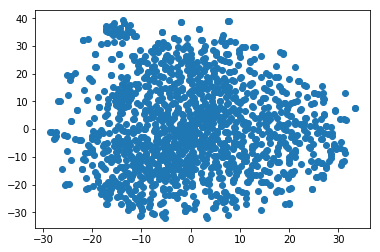

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_2d[:,0], X_2d[:,1])

In [28]:
from sklearn.cluster import KMeans
num_clusters = 10
kmeans_clustering = KMeans( n_clusters = num_clusters )

In [29]:
idx = kmeans_clustering.fit_predict( doc_vectors )

In [30]:
d = []
word_centroid_list = list(zip(model.docvecs.offset2doctag, idx))
word_centroid_list_sort = sorted(word_centroid_list, key=lambda el: el[1], reverse=False)
for word_centroid in word_centroid_list_sort:
    line = word_centroid[0] + '\t' + str(word_centroid[1]) + '\n'
    print(line)
    d.append({'artist': word_centroid[0], 'category': word_centroid[1]})

In [31]:
df = pd.DataFrame(d)
df.head()

""
